In [1]:
import numpy as np
from scipy.stats import distributions

import matplotlib.pyplot as plt

# Coin simulator

First let's write a simple function to simulate a coin flip.  We'll have it default to being unbiased.

In [2]:
def coin_flip(p_heads=0.5):
    if np.random.uniform() < p_heads:
        return 'H'
    else:
        return 'T'

Let's simulate a bunch of flips, keeping track of the number of heads as we go.

In [3]:
nflips = 500000

nheads = 0
head_counts = []
for i in range(nflips):
    if coin_flip() == 'H':
        nheads += 1
    head_counts.append(nheads)

We can look at the proportion of flips that were heads as we accumulated data to see how quickly the mean behavior approaches the true weight of the coin.

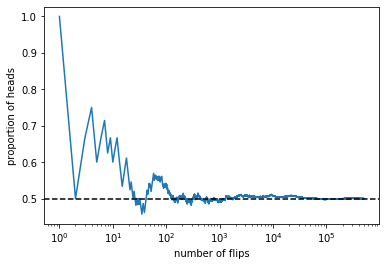

In [4]:
prop_heads = head_counts/np.arange(1, nflips+1)

plt.semilogx(np.arange(1, nflips+1), prop_heads)
plt.axhline(.5, ls='--', color='k')
plt.xlabel('number of flips')
plt.ylabel('proportion of heads');

To get a sense of the random behavior of a finite sample, we can conduct several trials of a fixed number of flips.

In [5]:
nflips = 50
ntrials = 1000
pheads = .5

trials = []
for trial in range(ntrials):
    nheads = 0
    for i in range(nflips):
        if coin_flip() == 'H':
            nheads += 1
    trials.append(nheads)

The distribution of the counts of heads should follow a binomial distribution.  We can use the binomial distribution from `scipy.stats.distributions` to check this.

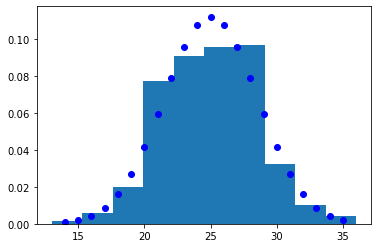

In [6]:
plt.hist(trials, density=True);
xs = np.arange(distributions.binom.ppf(0.001, nflips, pheads), distributions.binom.ppf(0.999, nflips, pheads))

plt.plot(xs, distributions.binom.pmf(xs, nflips, pheads), 'bo', label='binom pmf');

In [ ]:
def beta_prior(theta=guess, 